# Notes All Users

## Import Packages

In [21]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [22]:
df = pd.read_csv('../data/NMP/notas/users_notes.csv', index_col='note_id')

## Data Cleaning and Preparation

In [23]:
# The .csv is bugged
df.columns

Index(['user_id', 'title', 'body', 'course_id', 'created_at', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       ...
       'Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128', 'Unnamed: 129',
       'Unnamed: 130', 'Unnamed: 131', 'Unnamed: 132', 'Unnamed: 133',
       'Unnamed: 134', 'Unnamed: 135'],
      dtype='object', length=135)

In [24]:
df.head(5)

,user_id,title,body,course_id,created_at,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
note_id,,,,,,,,,,,,,,,,,,,,,
12,14,Disrupcion Tecnologica,"<p><span style=""font-size: 10px;"">Luego de que...",2,2018-02-20 14:48:14.327012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Recordatorio de repaso,<p>Repasar posteriormente el tema de teoría de...,2,2018-02-07 20:43:35.801686,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Nota de contenido,"<p><span style=""color: rgb(51, 51, 51); font-f...",2,2018-02-07 21:03:52.094832,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,recursos,<p>los recursos cambian&nbsp,</p>,NaN,2018-02-13 23:05:25.158851,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Visión sistemática,<p>Tipos de recursos que poseen las organizaci...,NaN,2018-02-14 02:32:58.02324,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Dropping extra (bugged) columns. Now only with user_id
df = df.user_id

In [26]:
df = df.value_counts()

## EDA: Exploratory Data Analysis

In [27]:
# General data statistics
df.describe()

count    236.000000
mean       3.478814
std        4.949487
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       44.000000
Name: user_id, dtype: float64

In [28]:
# Preview new Data Frame
df.head(5)

555    44
293    36
348    26
473    20
36     19
Name: user_id, dtype: int64

## Data Analysis and Visualizations

### Users with Notes

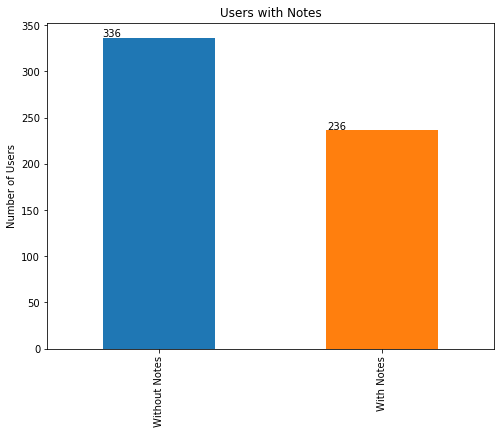

In [29]:
ax = pd.Series({'Without Notes': 572 - len(df), 'With Notes': len(df)}).plot(kind='bar', figsize=(8,6), title="Users with Notes")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Notes Frequencies

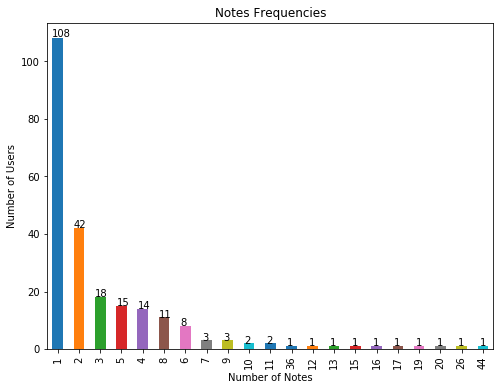

In [30]:
ax = df.value_counts().plot(kind='bar', figsize=(8,6), title="Notes Frequencies")
ax.set_xlabel("Number of Notes")
ax.set_ylabel("Number of Users")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [31]:
df.to_csv('../data/NMP/cooked_data_all_users/notes_by_user.csv', index_label='user_id', header=['frequency'])